In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

AZUL_PETROLEO = "#003366"
DORADO = "#FFA500"
ROSA = "#c706be"
ROJO = "#87050b"

airline = pd.read_csv("./customer_airways_data.csv", encoding="iso-8859-1")
airline.drop_duplicates(inplace=True)
airline = airline.loc[airline.booking_origin != "(not set)",:]

reviews = pd.read_csv("./cleaned-reviews.csv")

#### Graficamos las variables categoricas

/tmp/ipykernel_13691/996852210.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=airline,x="sales_channel",palette=[AZUL_PETROLEO,DORADO])


Text(0, 0.5, 'Cantidad de usuarios')

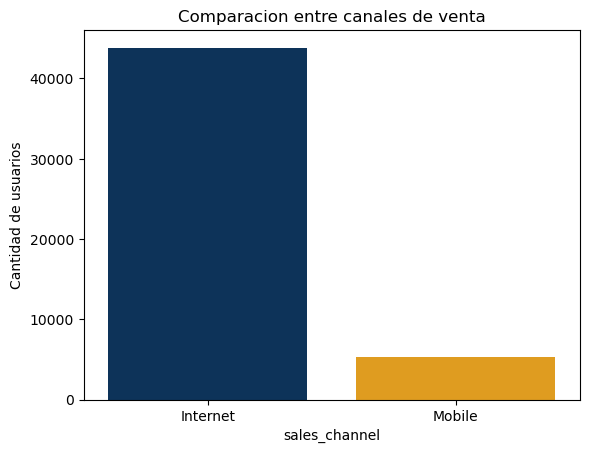

In [26]:
sns.countplot(data=airline,x="sales_channel",palette=[AZUL_PETROLEO,DORADO])
plt.title("Comparacion entre canales de venta")
plt.ylabel("Cantidad de usuarios")

/tmp/ipykernel_13691/2226661855.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=airline,x="trip_type",palette=[AZUL_PETROLEO,DORADO,ROSA])


Text(0, 0.5, 'Cantidad de usuarios')

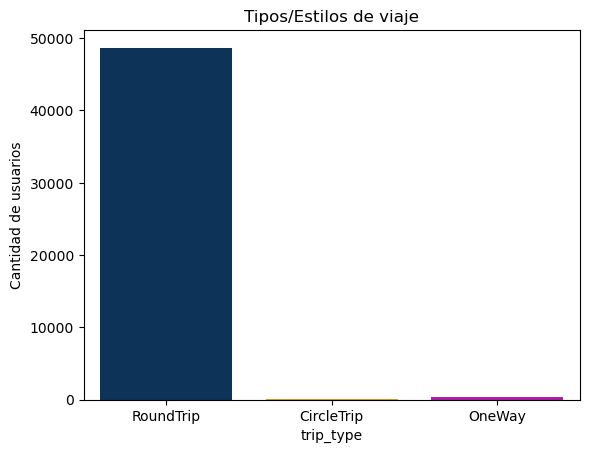

In [27]:
sns.countplot(data=airline,x="trip_type",palette=[AZUL_PETROLEO,DORADO,ROSA])
plt.title("Tipos/Estilos de viaje")
plt.ylabel("Cantidad de usuarios")

#### Un zoom

/tmp/ipykernel_13691/1188868841.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=airline,x="trip_type",palette=[AZUL_PETROLEO,DORADO,ROSA])


(0.0, 500.0)

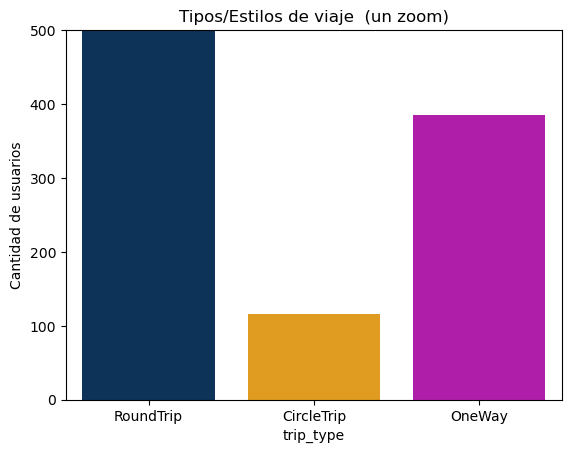

In [28]:
sns.countplot(data=airline,x="trip_type",palette=[AZUL_PETROLEO,DORADO,ROSA])
plt.title("Tipos/Estilos de viaje  (un zoom)")
plt.ylabel("Cantidad de usuarios")
plt.ylim(0,500)

/tmp/ipykernel_13691/1485789139.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=airline,x="flight_day",palette= [ "#0b132b","#473a57","#29434e","#006442","#585877","#632424","#987456"])


Text(0, 0.5, 'Cantidad de usuarios')

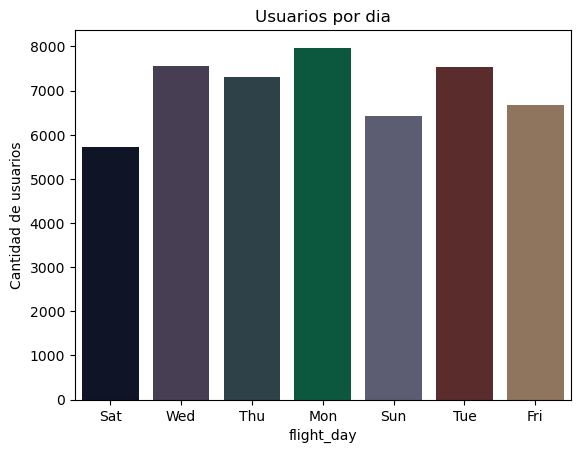

In [29]:
sns.countplot(data=airline,x="flight_day",palette= [ "#0b132b","#473a57","#29434e","#006442","#585877","#632424","#987456"])
plt.title("Usuarios por dia")
plt.ylabel("Cantidad de usuarios")

In [30]:
df_sales_channel = airline.sales_channel.value_counts().to_frame()
df_sales_channel["%"] = df_sales_channel["sales_channel"] * 100 / df_sales_channel["sales_channel"].sum()

df_trip_type = airline.trip_type.value_counts().to_frame()
df_trip_type["%"] = df_trip_type.trip_type * 100 / df_trip_type.trip_type.sum()

df_flight_day = airline.flight_day.value_counts().to_frame()
df_flight_day["%"] = df_flight_day.flight_day * 100 / df_flight_day.flight_day.sum()

print("\n")
print(df_sales_channel)
print("\n-------------------------------\n")
print(df_flight_day)
print("\n-------------------------------\n")
print(df_trip_type)

KeyError: 'sales_channel'

#### Posibilidad de completar la reserva

In [ ]:
airline.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,49203.000000,49203.000000,49203.000000,49203.000000,49203.000000,49203.000000,49203.000000,49203.000000,49203.000000
mean,1.590005,84.732293,23.061968,9.070951,0.668293,0.295714,0.426783,7.280812,0.149930
std,1.016291,90.437986,33.847217,5.410752,0.470831,0.456368,0.494615,1.496137,0.357006
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.000000,9.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.000000,13.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.000000,23.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Text(0, 0.5, 'Cantidad total de pasajeros')

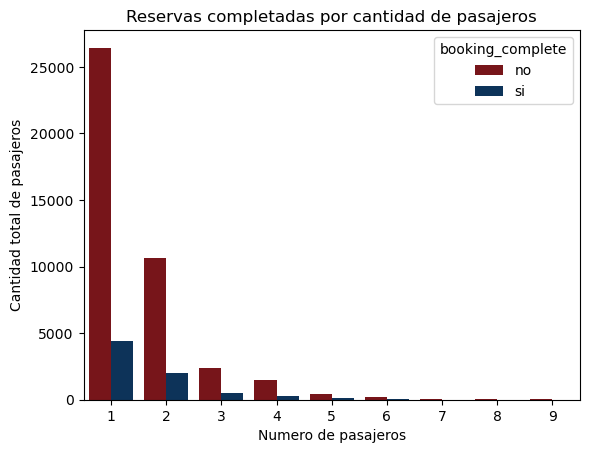

In [ ]:
sns.countplot(data=airline,x="num_passengers",palette=[ROJO,AZUL_PETROLEO,],hue=airline["booking_complete"].replace({0:"no",1:"si"}))
plt.title("Reservas completadas por cantidad de pasajeros")
plt.xlabel("Numero de pasajeros")
plt.ylabel("Cantidad total de pasajeros")


In [31]:
airline

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

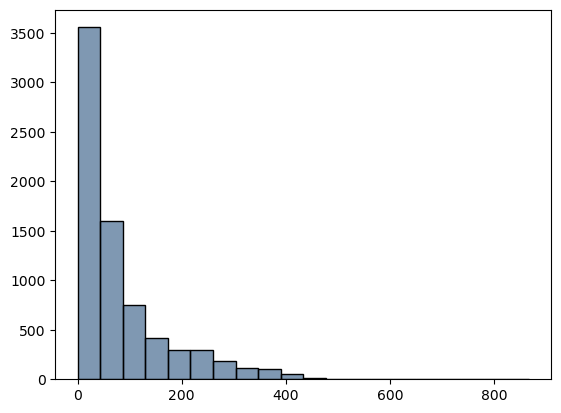

In [34]:
sns.histplot(data=airline,y="purchase_lead",palette=[ROJO,AZUL_PETROLEO],kde=True,bins=20,hue="booking_complete")
plt.title("Reservas completadas por dias entre reserva y partida")
plt.xlabel("Dias entre reserva y viaje")
plt.ylabel("Cantidad de reservas")


In [1093]:
airline.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

(0.0, 36000.0)

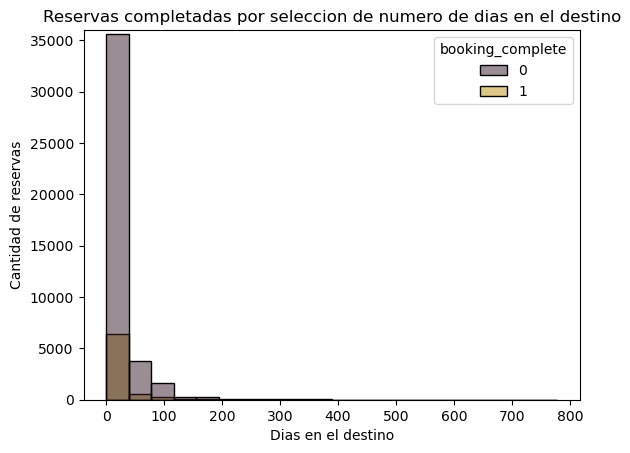

In [1094]:
sns.histplot(data=airline,x="length_of_stay",palette=["#371D2A","#BC9216"],bins=20,hue="booking_complete")
plt.title("Reservas completadas por seleccion de numero de dias en el destino")
plt.xlabel("Dias en el destino")
plt.ylabel("Cantidad de reservas")
plt.ylim(0,36000)


Text(9.0448236882716, 0.5, 'Cantidad de reservas')

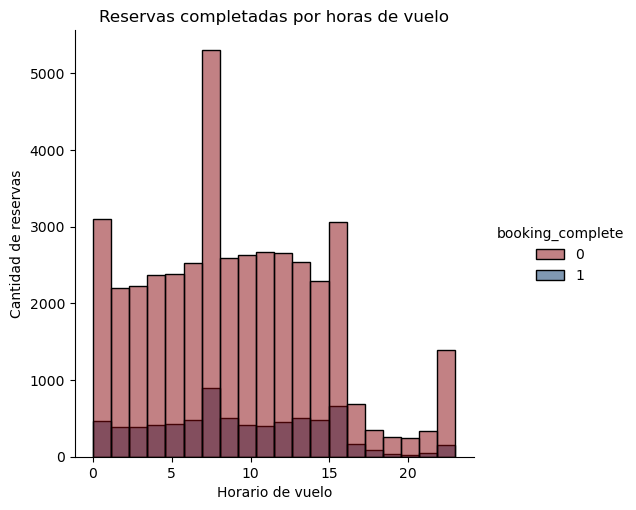

In [1095]:
sns.displot(data=airline,x="flight_hour",palette=[ROJO,AZUL_PETROLEO],bins=20,hue="booking_complete")
plt.title("Reservas completadas por horas de vuelo")
plt.xlabel("Horario de vuelo")
plt.ylabel("Cantidad de reservas")


Text(0.5, 1.0, 'Number of passengers complete reservation')

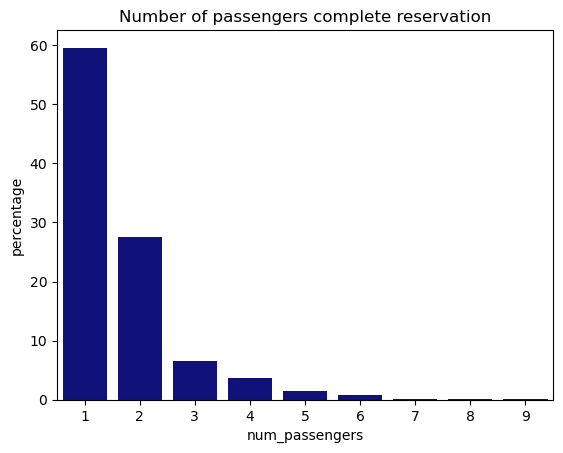

In [1096]:
df_booking_complete_per_passengers = airline.loc[airline.booking_complete == 1,"num_passengers"].value_counts()
df_booking_complete_per_passengers = df_booking_complete_per_passengers.to_frame()
df_booking_complete_per_passengers["%"] = df_booking_complete_per_passengers.num_passengers * 100 / df_booking_complete_per_passengers.num_passengers.sum()


df_booking_not_complete_per_passengers = airline.loc[airline.booking_complete == 0,"num_passengers"].value_counts()
df_booking_not_complete_per_passengers = df_booking_not_complete_per_passengers.to_frame()
df_booking_not_complete_per_passengers["%"] = df_booking_not_complete_per_passengers.num_passengers * 100 / df_booking_not_complete_per_passengers.num_passengers.sum()

sns.barplot(data=df_booking_complete_per_passengers,x=[1,2,3,4,5,6,7,9,8],y=df_booking_complete_per_passengers["%"],color="darkblue")
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Number of passengers complete reservation")


Text(0.5, 1.0, 'Number of passengers not complete reservation')

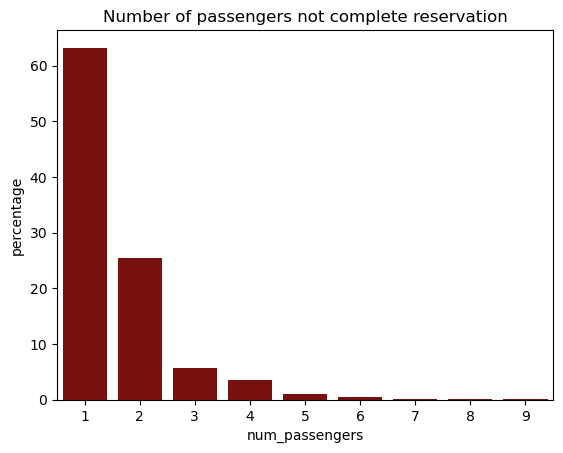

In [1097]:
sns.barplot(data=df_booking_not_complete_per_passengers,x=[1,2,3,4,5,6,7,8,9],y=df_booking_not_complete_per_passengers["%"],color="darkred")
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Number of passengers not complete reservation")

Text(0.5, 1.0, 'Percentage comparison of numbers of passengers who complete or do not complete the reservation')

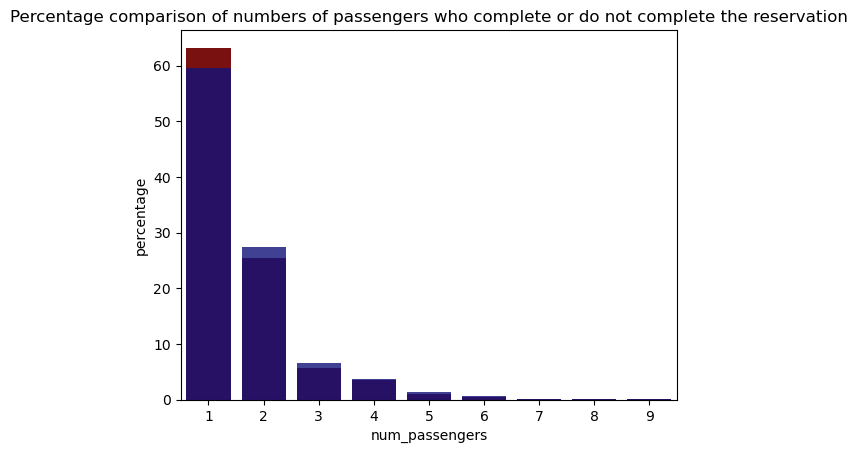

In [1098]:
sns.barplot(data=df_booking_not_complete_per_passengers,x=[1,2,3,4,5,6,7,8,9],y=df_booking_not_complete_per_passengers["%"],color="darkred")
sns.barplot(data=df_booking_complete_per_passengers,x=[1,2,3,4,5,6,7,9,8],y=df_booking_complete_per_passengers["%"],color="darkblue",alpha=0.8,width=0.8)
plt.xlabel("num_passengers")
plt.ylabel("percentage")
plt.title("Percentage comparison of numbers of passengers who complete or do not complete the reservation")



#### Notando que el numero de rechazo de reservas es muy superior, intentaremos analizar el motivo.

##### ¿Hay algun tipo de viaje mas rechazado ?

Text(0, 0.5, 'Cantidad de reservas')

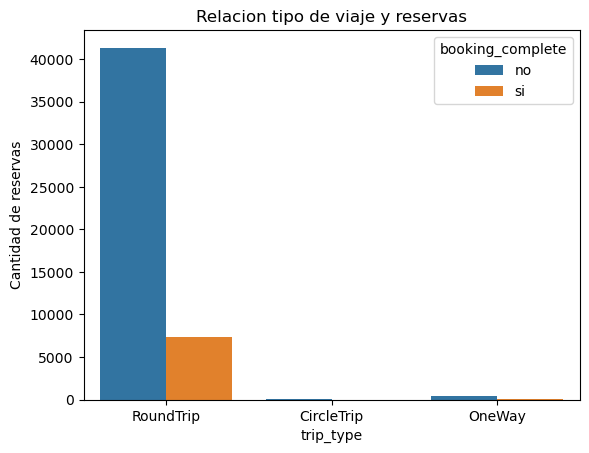

In [1099]:
sns.countplot(data=airline,x="trip_type",hue=airline["booking_complete"].replace({0:"no",1:"si"}))
plt.title("Relacion tipo de viaje y reservas")
plt.ylabel("Cantidad de reservas")


##### Observamos un alto número de reservas rechazadas para el tipo RoundTrip 
#### Para comprender mejor esta situación, analizaremos el porcentaje de si y no por cada uno


In [1100]:
round_trip = airline.loc[airline["trip_type"] == "RoundTrip",["trip_type","booking_complete"]]
round_trip.value_counts()

round_trip["%"] = 0

round_trip.loc[round_trip.booking_complete == 0,"%"] = round_trip.loc[round_trip.booking_complete == 0,"booking_complete"].count() * 100 / round_trip.booking_complete.count()

round_trip.loc[round_trip.booking_complete == 1,"%"] = round_trip.loc[round_trip.booking_complete == 1,"booking_complete"].count() * 100 / round_trip.booking_complete.count()

round_trip.value_counts()




trip_type  booking_complete  %        
RoundTrip  0                 84.904111    41350
           1                 15.095889     7352
dtype: int64

In [1101]:
one_way = airline.loc[airline["trip_type"] == "OneWay",["trip_type","booking_complete"]]


one_way["%"] = 0

one_way.loc[one_way.booking_complete == 0,"%"] = one_way.loc[one_way.booking_complete == 0,"booking_complete"].count() * 100 / one_way.booking_complete.count()

one_way.loc[one_way.booking_complete == 1,"%"] = one_way.loc[one_way.booking_complete == 1,"booking_complete"].count() * 100 / one_way.booking_complete.count()

one_way.value_counts()


trip_type  booking_complete  %        
OneWay     0                 94.805195    365
           1                 5.194805      20
dtype: int64

In [1102]:
circle_trip = airline.loc[airline["trip_type"] == "CircleTrip",["trip_type","booking_complete"]]


circle_trip["%"] = 0

circle_trip.loc[circle_trip.booking_complete == 0,"%"] = circle_trip.loc[circle_trip.booking_complete == 0,"booking_complete"].count() * 100 / circle_trip.booking_complete.count()

circle_trip.loc[circle_trip.booking_complete == 1,"%"] = circle_trip.loc[circle_trip.booking_complete == 1,"booking_complete"].count() * 100 / circle_trip.booking_complete.count()

circle_trip.value_counts()





trip_type   booking_complete  %        
CircleTrip  0                 95.689655    111
            1                 4.310345       5
dtype: int64

/tmp/ipykernel_11993/3534139723.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type["booking_complete"].replace({0:"no",1:"si"}), y="%",data=type, ax=axes[i],palette=[AZUL_PETROLEO,ROJO])
/tmp/ipykernel_11993/3534139723.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type["booking_complete"].replace({0:"no",1:"si"}), y="%",data=type, ax=axes[i],palette=[AZUL_PETROLEO,ROJO])
/tmp/ipykernel_11993/3534139723.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type["booking_complete"].replace({0:"no",1:"si"}), y="%",data=type, ax=

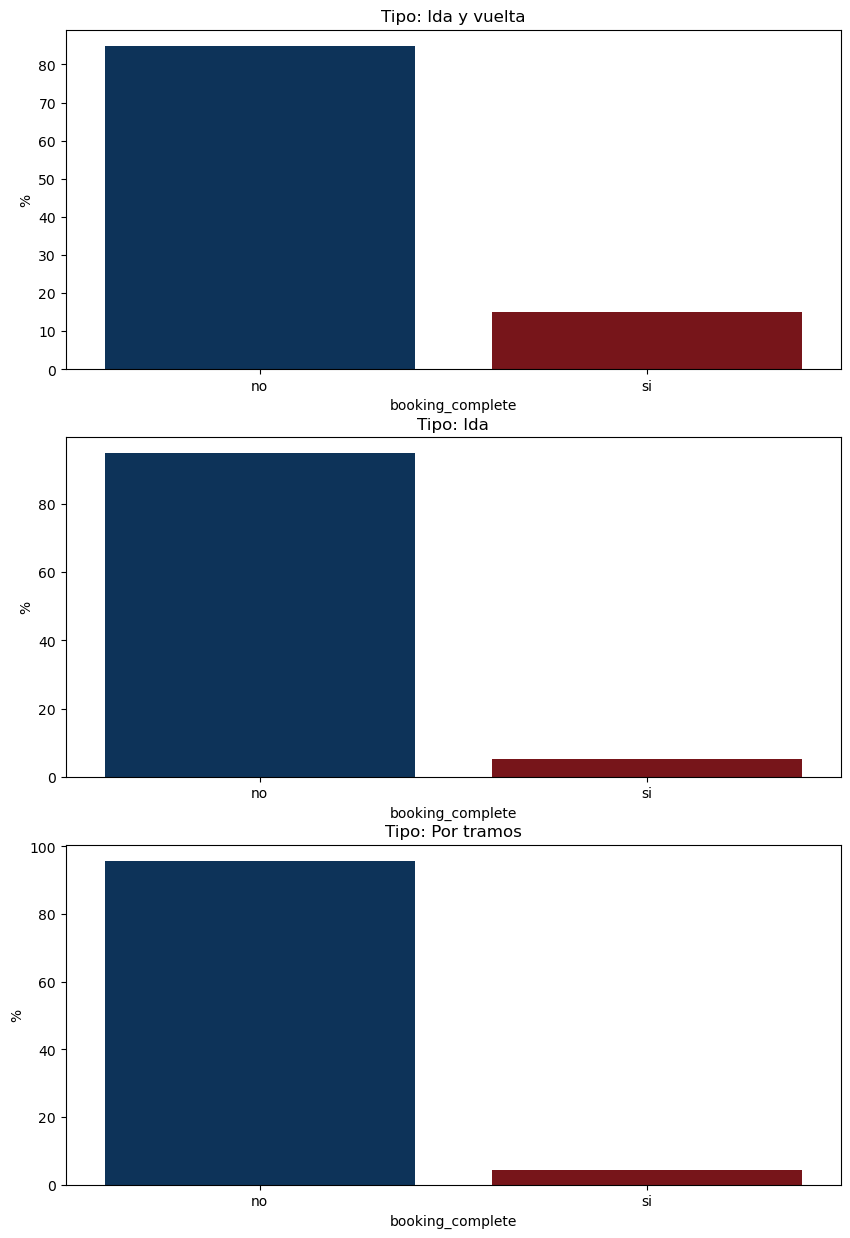

In [1103]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

data = [round_trip,one_way,circle_trip]
titles = ["Tipo: Ida y vuelta","Tipo: Ida","Tipo: Por tramos"]

for i, type in enumerate(data):
    sns.barplot(x=type["booking_complete"].replace({0:"no",1:"si"}), y="%",data=type, ax=axes[i],palette=[AZUL_PETROLEO,ROJO])


for i, titles in enumerate(["Tipo: Ida y vuelta","Tipo: Ida","Tipo: Por tramos"]):
    axes[i].set_title(titles)


plt.subplots_adjust(wspace=0.85)


#### Centremos el analisis en RoundTrip

In [1104]:
airline_round_trip = airline.loc[airline.trip_type == "RoundTrip",:]
del airline_round_trip["trip_type"]
airline_round_trip

,num_passengers,sales_channel,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


#### Relacion entre la espera entre "tiempo de reserva y viaje" y "tiempo de estadia"

In [1105]:
airline_round_trip.purchase_lead.describe()

count    48702.000000
mean        84.649973
std         90.453222
min          0.000000
25%         21.000000
50%         51.000000
75%        115.000000
max        867.000000
Name: purchase_lead, dtype: float64

Text(0.5, 1.0, 'Reservas no completadas')

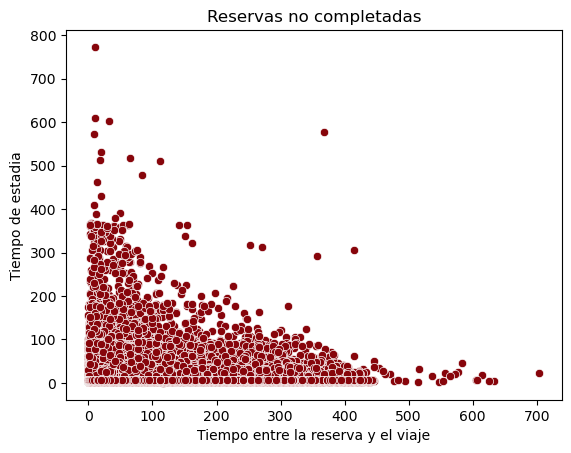

In [1106]:

sns.scatterplot(data=airline_round_trip.loc[airline_round_trip.booking_complete == 0],x="purchase_lead",y="length_of_stay",color=[ROJO])
plt.xlabel("Tiempo entre la reserva y el viaje")
plt.ylabel("Tiempo de estadia")
plt.title("Reservas no completadas")

Text(0.5, 1.0, 'Reservas completadas')

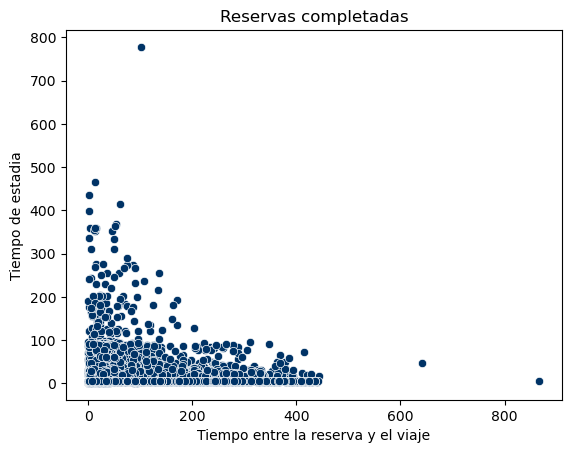

In [1107]:

sns.scatterplot(data=airline_round_trip.loc[airline_round_trip.booking_complete == 1],x="purchase_lead",y="length_of_stay",color=[AZUL_PETROLEO])
plt.xlabel("Tiempo entre la reserva y el viaje")
plt.ylabel("Tiempo de estadia")
plt.title("Reservas completadas")

#### El gráfico de estilos de viaje nos reveló que el viaje RoundTrip es la opción predilecta. Pero, ¿a qué se debe esta preferencia? Descubriendo las claves del roundtrip: 
#### Estancias cortas: La mayoría de las reservas se realizan para estancias medianamente cortas, inferiores a 100 días. El tiempo de reserva y el tiempo de viaje es un factor determinante. La mayoría de las reservas se realizan con anticipación, también inferior a 100 días. 

Text(0.5, 1.0, 'Reservas completadas')

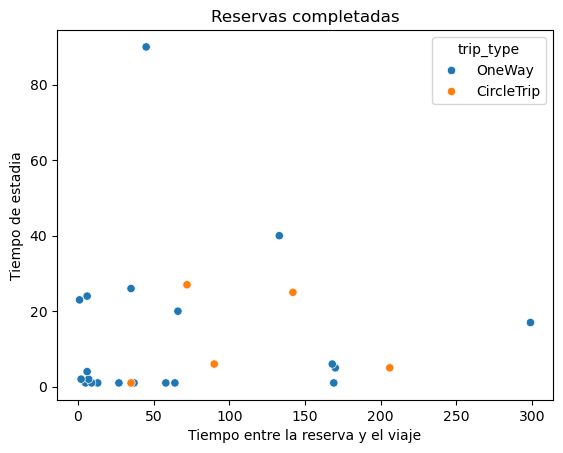

In [1108]:
sns.scatterplot(data=airline,x="purchase_lead",y="length_of_stay",hue=airline.loc[(airline["trip_type"] != "RoundTrip") & (airline["booking_complete"] == 1),"trip_type"])
plt.xlabel("Tiempo entre la reserva y el viaje")
plt.ylabel("Tiempo de estadia")
plt.title("Reservas completadas")

#### Hay relacion con el tipo de viaje para estas preferencias ?

In [1109]:
airline_wants = airline[['wants_extra_baggage', 'wants_preferred_seat','wants_in_flight_meals','trip_type','flight_hour']]

Text(0.5, 1.0, 'Prefeencias vs Tipo de Viajes')

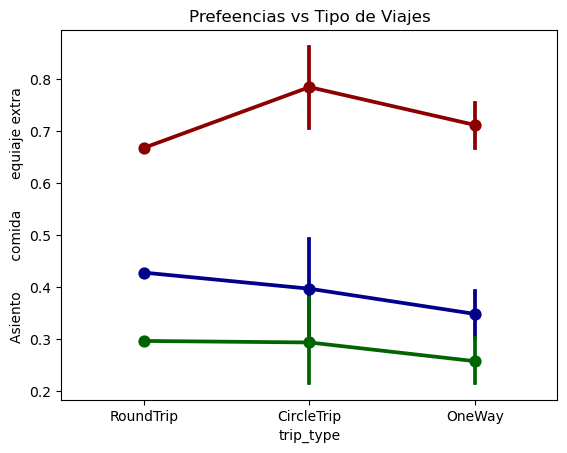

In [1110]:
sns.pointplot(data=airline,x="trip_type",y='wants_extra_baggage',linestyle="solid",color="darkred")
sns.pointplot(data=airline,x="trip_type",y='wants_in_flight_meals',linestyle="solid",color="darkblue")
sns.pointplot(data=airline,x="trip_type",y="wants_preferred_seat",linestyle="solid",color="darkgreen")
plt.ylabel('Asiento       comida       equiaje extra')
plt.title("Prefeencias vs Tipo de Viajes")

#### Seria interesante analizar si  disminucion del equipaje extra se debe a que el numero de solicitante de reserva es mayor:


<AxesSubplot:xlabel='num_passengers', ylabel='wants_extra_baggage'>

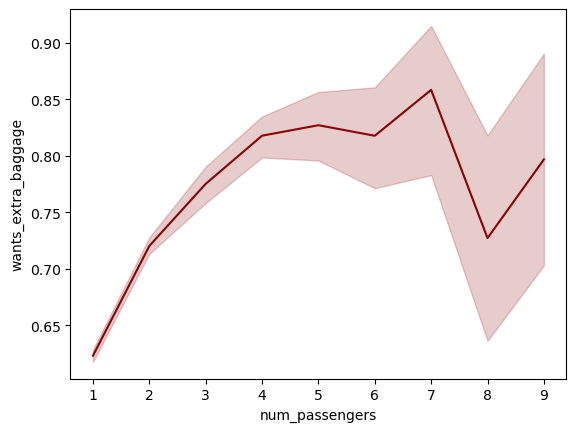

In [1111]:
sns.lineplot(data=airline[['wants_extra_baggage', 'num_passengers']],x="num_passengers",y='wants_extra_baggage',linestyle="solid",color="darkred")

#### Pero que ocurre para las reservas completas ?

Text(0.5, 0, 'NUmero de pasajeros')

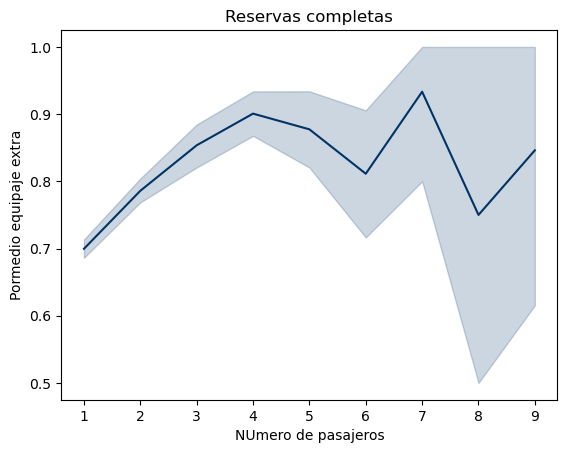

In [1112]:
sns.lineplot(data=airline.loc[airline.booking_complete == 1],x="num_passengers",y='wants_extra_baggage',linestyle="solid",color=AZUL_PETROLEO)
plt.title("Reservas completas")
plt.ylabel("Pormedio equipaje extra")
plt.xlabel("NUmero de pasajeros")

### Seguimos con cleaned-reviews:

In [1176]:
reviews.describe()

,Unnamed: 0,rates
count,3411.000000,3411.000000
mean,1705.668133,4.821167
std,985.831888,3.145863
min,0.000000,1.000000
25%,852.500000,2.000000
50%,1705.000000,4.000000
75%,2557.500000,8.000000
max,3417.000000,10.000000


#### Existe un sesgo de pais de origen de los clientes al puntuar el servicio ?

In [1177]:
countries = reviews.country.value_counts().to_frame().reset_index().rename(columns={"index": "country","country":"quantity"})
countries

,country,quantity
0,United Kingdom,2165
1,United States,361
2,Australia,147
3,Canada,104
4,Germany,60
...,...,...
64,Iceland,1
65,Saint Kitts and Nevis,1
66,Costa Rica,1
67,Cayman Islands,1


Vamos a considerar solo los paises con mas participaccion, ya que son los que mas van a influir

In [1178]:
countries_reviews = pd.merge(reviews,countries, how="right", on="country")
countries_reviews

,Unnamed: 0,reviews,rates,date,country,verified,comments,quantity
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...,2165
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...,2165
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...,2165
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...,2165
4,5,Not Verified | As a Spanish born individual l...,3,2023-01-19,United Kingdom,False,verified spanish born individual living englan...,2165
...,...,...,...,...,...,...,...,...
3406,1319,✅ Verified Review | London to Keflavik. The B...,3,2017-07-09,Iceland,False,review london keflavik british airway experien...,1
3407,416,✅ Trip Verified | London to Hong Kong. At the...,10,2020-01-06,Saint Kitts and Nevis,True,london hong kong entrance ba business lounge s...,1
3408,1255,✅ Verified Review | San Jose to London Gatwic...,8,2017-08-28,Costa Rica,False,review san jose london gatwick return outward ...,1
3409,1205,✅ Verified Review | Grand Cayman to London. I...,2,2017-10-11,Cayman Islands,False,review grand cayman london comprehend flight s...,1


In [1222]:
rates_verified_country = reviews_merge.loc[reviews_merge.verified == True,["country","mean_rates_per_country"]].value_counts().to_frame().reset_index()

del rates_verified_country[0]

rates_verified_country = rates_verified_country.sort_values(by="mean_rates_per_country",ascending=False)

rates_verified_country

,country,mean_rates_per_country
38,Saint Kitts and Nevis,10.000000
22,Argentina,7.666667
31,Norway,6.000000
19,Belgium,5.809524
46,Denmark,5.545455
15,Hong Kong,5.500000
2,Australia,5.414966
7,France,5.346154
6,Switzerland,5.270270
14,Spain,5.230769


<AxesSubplot:xlabel='mean_rates_per_country', ylabel='country'>

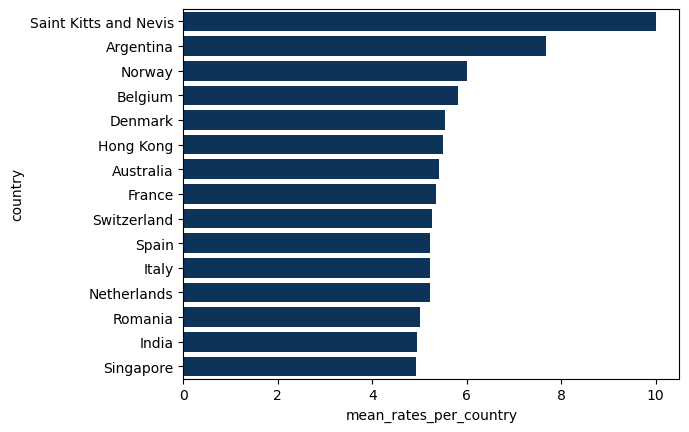

In [1227]:
sns.barplot(data=rates_verified_country.head(15),x="mean_rates_per_country",y="country",color=AZUL_PETROLEO)


Text(0.5, 0, 'Promedio de puntaje')

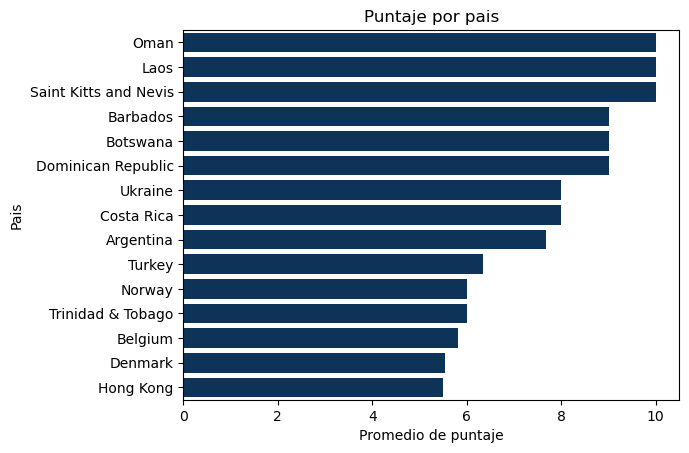

In [1125]:
sns.barplot(data=df.head(15),x="mean_rates_per_country",y="country",color=AZUL_PETROLEO)

plt.title("Puntaje por pais")
plt.ylabel("Pais")
plt.xlabel("Promedio de puntaje")


(0.0, 4.0)

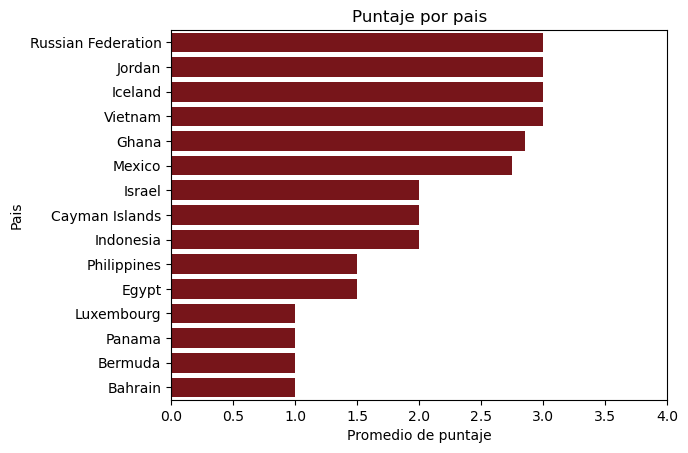

In [1133]:
sns.barplot(data=df.tail(15),x="mean_rates_per_country",y="country",color=ROJO)

plt.title("Puntaje por pais")
plt.ylabel("Pais")
plt.xlabel("Promedio de puntaje")
plt.xlim(0,4)

### Nos centamos solo en los reviews verificados

In [1147]:
reviews_verified = reviews.loc[reviews.verified == True,:]

In [1148]:
countries = reviews_verified.groupby("country")["rates"].mean()
countries = countries.to_frame().reset_index()

reviews_merge = pd.merge(reviews_verified, countries, how="inner", on="country").rename(columns={"rates_x":"rates","rates_y":"mean_rates_per_country"})
reviews_merge

,Unnamed: 0,reviews,rates,date,country,verified,comments,mean_rates_per_country
0,0,✅ Trip Verified | Excellent service both on th...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...,4.55914
1,1,✅ Trip Verified | Good lounge at Cape Town. O...,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...,4.55914
2,2,✅ Trip Verified | A really excellent journey....,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...,4.55914
3,3,✅ Trip Verified | This flight was one of the ...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...,4.55914
4,6,✅ Trip Verified | A rather empty and quiet fl...,2,2023-01-18,United Kingdom,True,rather empty quiet flight tel aviv friendly ca...,4.55914
...,...,...,...,...,...,...,...,...
971,834,✅ Trip Verified | London to Vienna. I was sho...,9,2018-10-17,Austria,True,london vienna shocked ba provides buy onboard ...,9.00000
972,1036,✅ Trip Verified | London to Belfast. Another r...,3,2018-03-13,Portugal,True,london belfast another regular flight british ...,2.00000
973,1040,✅ Trip Verified | Flew British Airways from Li...,1,2018-03-06,Portugal,True,flew british airway lisbon london heathrow une...,2.00000
974,1083,✅ Trip Verified | London to Bangkok. I was a ...,2,2018-01-17,Portugal,True,london bangkok bit apprehensive flying ba club...,2.00000


In [1151]:
df = reviews_merge.groupby("country")["mean_rates_per_country"].mean().to_frame().reset_index(level=0)
df = df.sort_values(by="mean_rates_per_country",ascending=False)
df

,country,mean_rates_per_country
35,Saint Kitts and Nevis,10.000000
2,Austria,9.000000
33,Romania,9.000000
27,Norway,7.500000
0,Argentina,7.250000
9,Denmark,7.000000
8,Czech Republic,6.000000
10,France,6.000000
37,Singapore,5.555556
36,Saudi Arabia,5.500000


Text(0.5, 0, 'Promedio de puntaje')

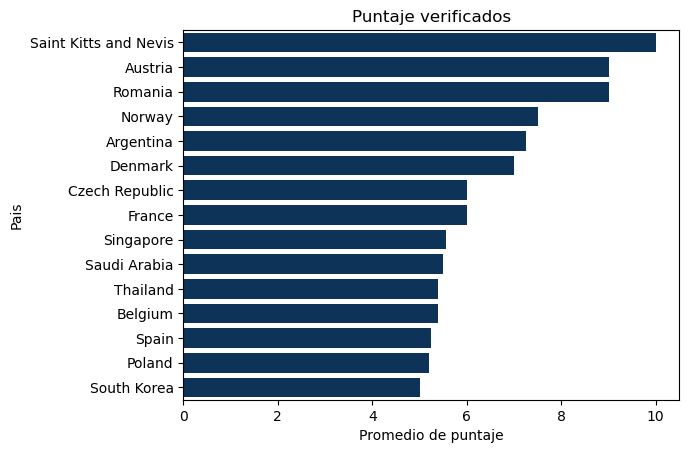

In [1152]:
sns.barplot(data=df.head(15),x="mean_rates_per_country",y="country",color=AZUL_PETROLEO)

plt.title("Puntaje verificados")
plt.ylabel("Pais")
plt.xlabel("Promedio de puntaje")

Text(0.5, 0, 'Promedio de puntaje')

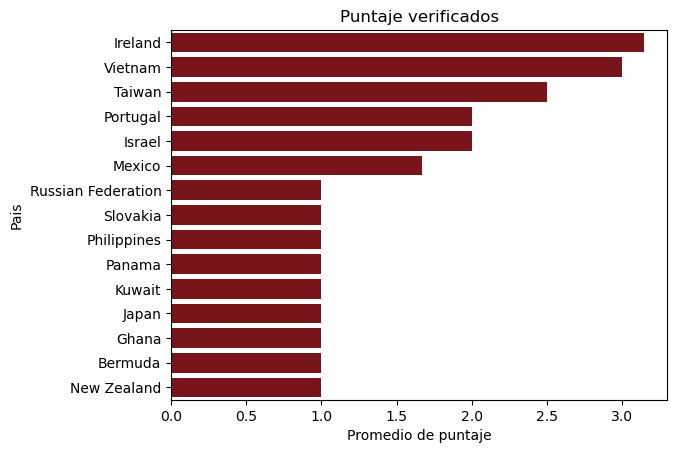

In [1153]:
sns.barplot(data=df.tail(15),x="mean_rates_per_country",y="country",color=ROJO)

plt.title("Puntaje verificados")
plt.ylabel("Pais")
plt.xlabel("Promedio de puntaje")

### Conclusiones:

1. El canal de venta preferido por los clientes es via Internet
3. La taza de reservas concretadas es mayor cuanto menor es el grupo de personas, siendo el pasaje unico el de mejores resultados
4. Hay una preferencia por tomar vuelos entre las 6 y 14 hs
5. RoundTrip es el tipo de viaje mas solicitado
6. RoundTrip es el tipo de viaje con mejor taza de concrecion de reserva para grupos de personas entre 1 y 3
7. La taza de concrecion de reserva para 7 pasajeros en OneWay es la mas alta en su tipo
8. OneWay tiene resultados muy desfavorables en general
9. CircleTrip es la peor categoria de tipo de vuelo, con una taza de concrecion muy baja, la cantidad de reservas no completas esta muuy por arriba de las completas
10. RoundTrip obtiuene resultados positivos para esperas menores a 200 dias
11. OnewWay obtiene resultados positivos para esperas menosres a 175 dias
12. CircleTrip muestra pocos resultados positivos, solo viendoloes en reservas con 1 o 2 pasajeros y menos de 150 dias de esera


------------------

### Análisis de reservas de vuelos - Conclusiones

+ Preferencias de clientes:

  1. Internet es el canal de venta predilecto.
  2. Las reservas para un solo pasajero presentan la tasa de concreción más alta, seguidas por grupos pequeños (2 a 4 personas).
  3. La franja horaria preferida se extiende entre las 6 y las 14 horas.
  4. RoundTrip es viaje más solicitado.
  5. Eficiencia en grupos pequeños. RoundTrip también brilla en la tasa de concreción para grupos de 1 a 3 personas.
  6. OneWay tiene resultados altibajos. OneWay presenta resultados positivos para esperas inferiores a 175 días, pero su tasa general de concreción es menos favorable. Aunque para 7 pasajeros se destaca con la tasa de concreción más alta dentro de su tipo.
  7. CircleTrip se ubica como la categoría con menor tasa de concreción, pero se ven resultados positivos se concentran en reservas con 1 o 2 pasajeros y esperas inferiores a 150 días.
  8. RoundTrip y OneWay crecen con esperas acotadas. Ambos tipos de viaje muestran mejores resultados para esperas menores a 200 y 175 días respectivamente.

#### Este análisis nos invita a reflexionar sobre las preferencias de los clientes impulsando a:

+ Fortalecer el canal de venta online.
+ Optimizar las estrategias para grupos grandes.
+ Enfocarnos en la mejora de CircleTrip.
